In [2]:
from nufeb_tools import utils,plot
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks
from scipy.spatial.distance import pdist,squareform
from scipy.spatial import KDTree
from scipy.spatial import Voronoi, voronoi_plot_2d
from pathlib import Path
from tqdm import tqdm
import cv2

In [3]:
BASE_DIR = Path(f'../simulation-data/spacing/')
folders = [path for path in BASE_DIR.iterdir() if path.is_dir()]
data = [utils.get_data(directory=str(x)) for x in folders]

In [4]:
def colony(obj,time,colors=None,colony=None,ax=None,by=None,img=np.array([]),**kwargs):
    """
    Plot bacterial colonies at a specific timepoint

    Args:
        obj (nufeb_tools.utils.get_data): 
            Object containing cell locations
        time (int): 
            Simulation timestep to plot
        colors (dict, optional): 
            Dictionary of colors to plot each colony. Defaults to None.
        colony (int, optional): 
            Plot a specific colony. Defaults to None.
        ax (matplotlib.pyplot.axes, optional): 
            Axis to plot on. Defaults to None.
        by (str, optional): 
            Plot by species. Defaults to None.
    """

    if not hasattr(obj,'colonies'):
        obj.get_mothers()
    df = obj.colonies
    ax = ax or plt.gca()
    timepoint = time
    dims=obj.metadata['Dimensions']
    if img.size==0:
        img_size = 2000
        bk = 255 * np.ones(shape=[img_size, img_size, 3], dtype=np.uint8)
    else:
        img_size = img.size[0]
        bk = img
    if by == 'Species' or by == 'species' or by == 'type':
        colors = {1 : (26,150,65) ,2 : (230,97,1)}
        tp = df[df.Timestep == timepoint]
        circles = [cv2.circle(bk,center = (round(x/dims[0]*img_size),
                    round(y/dims[1]*img_size)),radius = round(radius/dims[1]*img_size),
                    color = (int(colors[type_][0]),int(colors[type_][1]),int(colors[type_][2])),thickness = -1) for x,y, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type)]
    elif colony == None and by == None:
        if colors == None:
            IDs = sorted(df[df.mother_cell != -1].mother_cell.unique())
            colors = {x : tuple(np.random.randint(0,256, 3).astype('int')) for x in IDs}
        tp = df[df.Timestep == timepoint]
        circles = [cv2.circle(bk,center = (round(x/dims[0]*img_size),
                    round(y/dims[1]*img_size)),radius = round(radius/dims[1]*img_size),
                    color = (int(colors[cell][0]),int(colors[cell][1]),int(colors[cell][2])),thickness = -1) for x,y, radius,cell in zip(tp.x,tp.y,tp.radius,tp.mother_cell)]
    else:
        if colors == None:
            colors = tuple(np.random.randint(0,256, 3).astype('int'))
        color = colors
        tp = df[(df.Timestep == timepoint) & (df.mother_cell==colony)]
        circles = [cv2.circle(bk,center = (round(x/dims[0]*img_size),
                    round(y/dims[1]*img_size)),radius = round(radius/dims[1]*img_size),
                    color = (int(color[0]),int(color[1]),int(color[2])),thickness = -1) for x,y, radius,cell in zip(tp.x,tp.y,tp.radius,tp.mother_cell)]

    ax.imshow(bk)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return bk,(ax)

Assigning ancestry:   0%|          | 0/350 [00:00<?, ?it/s]C:\Users\Jonathan\anaconda3\envs\nufeb\lib\site-packages\nufeb_tools\utils.py:305: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  motherless = pd.merge(temp,ancestors,on='ID',how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1).drop('x_y',1).iloc[:,:4]
Assigning ancestry: 100%|██████████| 350/350 [00:08<00:00, 41.78it/s]
C:\Users\Jonathan\anaconda3\envs\nufeb\lib\site-packages\nufeb_tools\utils.py:311: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.join(ancestry_df.set_index(['ID']),on='ID',how='right', lsuffix='_left', rsuffix='').drop('mother_cell_left',1)
Assigning ancestry: 100%|██████████| 350/350 [00:08<00:00, 39.77it/s]


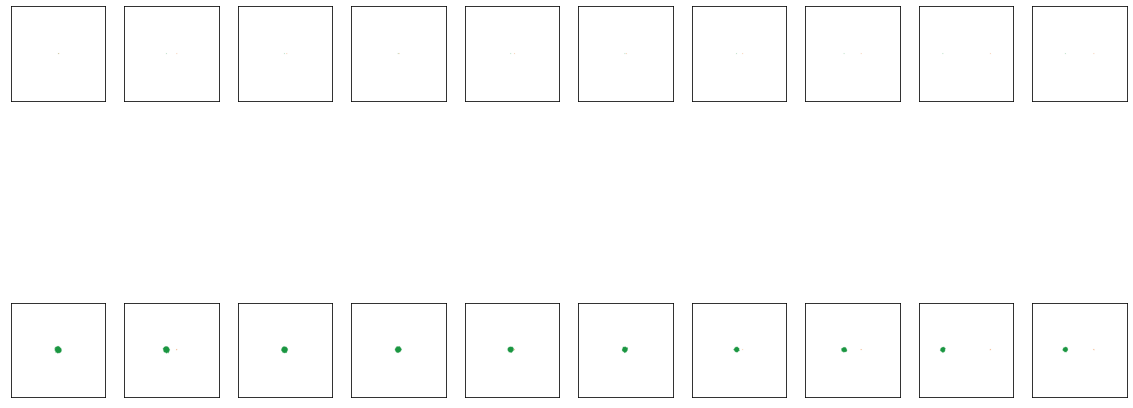

In [5]:
window=200
f,axes = plt.subplots(nrows=2,ncols=len(data),figsize=(20,10))
for ax, x in zip(axes.ravel()[:len(data)],data):
    im0,_=colony(x,0,by='Species',ax=ax)
    x1 = int(im0.shape[0]/2-window)
    x2= int(im0.shape[0]/2+window)
    ax.imshow(im0[x1:x2,x1:x2,:])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
for ax, x in zip(axes.ravel()[len(data):],data):
    im35,_=colony(x,35000,by='Species',ax=ax)
    x1 = int(im35.shape[0]/2-window)
    x2= int(im35.shape[0]/2+window)
    ax.imshow(im35[x1:x2,x1:x2,:])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
plt.show()
f.tight_layout()

In [6]:
im0.shape

(2000, 2000, 3)